In [1]:
import sympy as sym

In [2]:
p1, p2, p3, p4, p5, p6, p7, p8 = sym.symbols("p1:9")

**Conditions in the one-bit case**

In [2]:
def one_bit_condition_one(p1, p2, c, b):
    
    return p4 < 1 - c / b 

**Conditions in the two-bit case**

In [3]:
def two_bit_condition_one(p1, p2, p3, p4):
    
    return p4 - (1 - c / b)

def two_bit_condition_two(p1, p2, p3, p4):
    
    return p2 + p3 - (2 - c / b)

**Conditions in the two-bit case**

In [4]:
def three_bit_condition_one(p1, p2, p3, p4, p5, p6, p7, p8, b, c):
    
    return p8 - (1 - c / b)

def three_bit_condition_two(p1, p2, p3, p4, p5, p6, p7, p8, b, c):
    
    return p3 + p6 - (2 - c / b)

def three_bit_condition_three(p1, p2, p3, p4, p5, p6, p7, p8, b, c):
    
    return p2 + p3 + p5 - (3 - c / b)

def three_bit_condition_four(p1, p2, p3, p4, p5, p6, p7, p8, b, c):
    
    return p4 + p6 + p7 - (3 - 2 * c / b)

def three_bit_condition_five(p1, p2, p3, p4, p5, p6, p7, p8, b, c):
    
    return p2 + p4 + p5 + p7 - (4 - 2 * c / b)

**Two bit case**

In [7]:
c, b = sym.symbols("c, b")

In [18]:
sym.solve(two_bit_condition_two(p1, p2, p2, p4), p2)[0].factor().subs({b: 1, c: .5})

0.750000000000000

In [21]:
sym.solve(two_bit_condition_one(p1, p2, p2, p4), p4)[0].factor().subs({b: 1, c: .5})

0.500000000000000

In [177]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [102]:
plt.rcParams["font.size"] = 9
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

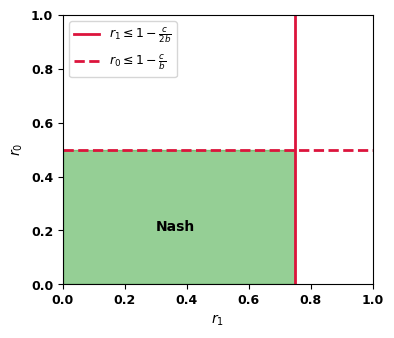

In [163]:
fig, ax = plt.subplots(figsize=(4, 3.5))

plt.axvline(x = sym.solve(two_bit_condition_two(p1, p2, p2, p4), p2)[0].factor().subs({b: 1, c: .5}),
           label=r"$r_1 \leq 1 - \frac{c}{2 b}$", color='crimson', linewidth=2);

plt.axhline(y = sym.solve(two_bit_condition_one(p1, p2, p2, p4), p4)[0].factor().subs({b: 1, c: .5}),
            linestyle='--',
            label=r"$r_0 \leq 1 - \frac{c}{b}$",
            color='crimson',
            linewidth=2
            );

x = [0, 0, .75, .75]

y = [0, .5, .5, 0]

plt.fill(x, y, alpha=.5, color='tab:green')

plt.ylim(0, 1)

plt.xlim(0, 1);

plt.legend();

plt.ylabel("$r_0$", fontsize=10);

plt.xlabel("$r_1$", fontsize=10);

plt.text(.3, .2, "Nash", fontsize=10,  color='black');

**Three bit case**

In [174]:
p8_val = sym.solve(three_bit_condition_one(p1, p2, p3, p4, p5, p6, p7, p8, b, c), p8)[0].subs({b:1, c:.5})

In [172]:
p2_val = sym.solve(three_bit_condition_three(p1, p2, p2, p4, p2, p6, p7, p8, b, c), p2)[0].factor().subs({b:1, c:.5})

In [62]:
three_bit_condition_two(p1, p2, p3, p4, p5, p6, p7, p8, b, c)

p3 + p6 - 2 + c/b

In [173]:
p4_val = sym.solve(three_bit_condition_four(p1, p2, p3, p4, p5, p4, p4, p8, b, c), p4)[0].factor().subs({b:1, c:.5})

In [145]:
x = np.arange(0, 1, 0.03)

y1 = np.arange(0, 1, 0.03)

y2 = np.arange(0, 1, 0.03)

xx1, yy1 = np.meshgrid(x, y1)

z = 1 / 2 + 0 * xx1 + 0 * yy1

z2 = 0.833333333333333 + 0 * xx1 + 0 * yy1

z3 = 0.666666666666667 + 0 * xx1 + 0 * yy1

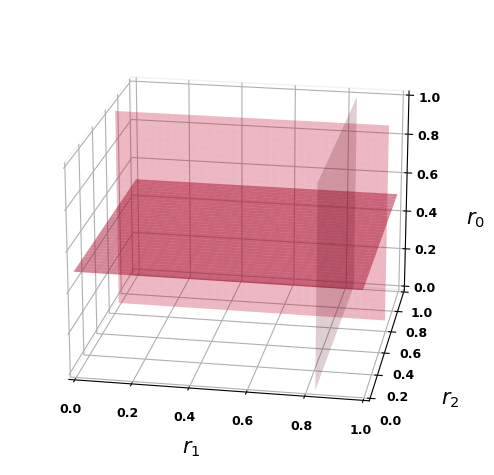

In [171]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, projection='3d')


ax.plot_surface(xx1, yy1, z, alpha=0.5, color='crimson')

ax.plot_surface(z2, xx1, yy1, alpha=0.2, color='crimson')

ax.plot_surface(xx1, z3, yy1, alpha=0.3, color='crimson')

ax.view_init(20, -80)

ax.set_xlim(0, 1);
ax.set_ylim(0, 1);
ax.set_zlim(0, 1);

ax.annotate("$r_1$", (-0.025, -0.09), fontsize=15)
ax.annotate("$r_2$", (.08, -0.07), fontsize=15)
ax.annotate("$r_0$", (.09, 0.003), fontsize=15)


ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

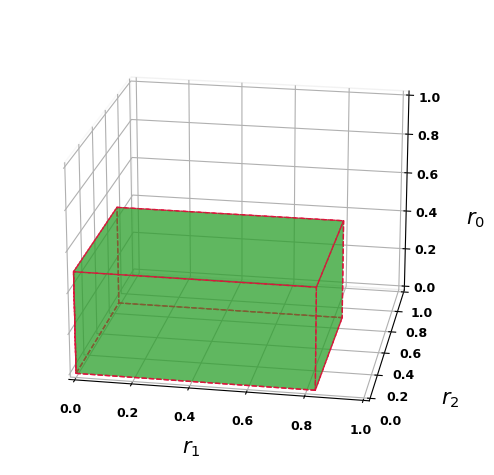

In [200]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, projection='3d')

v = np.array([[0, 0, 0],
              [0, p4_val, 0],
              [p2_val, p4_val, 0], 
              [p2_val, 0, 0],
              [0, 0, p8_val],
              [0, p4_val, p8_val],
              [p2_val, p4_val, p8_val],
              [p2_val, 0, p8_val],])

verts = [[v[0], v[1], v[2], v[3], v[0], v[4], v[5], v[6], v[7], v[4]],
         [v[0], v[1], v[5], v[4]],
         [v[1], v[2], v[6], v[5]],
         [v[2], v[3], v[7], v[6]],
         [v[3], v[0], v[4], v[7]]]
            
ax.add_collection3d(Poly3DCollection(verts, facecolors="tab:green", alpha=.5,
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='crimson',))
ax.view_init(20, -80)

ax.set_xlim(0, 1);
ax.set_ylim(0, 1);
ax.set_zlim(0, 1);

ax.annotate("$r_1$", (-0.025, -0.09), fontsize=15)
ax.annotate("$r_2$", (.08, -0.07), fontsize=15)
ax.annotate("$r_0$", (.09, 0.003), fontsize=15)


ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


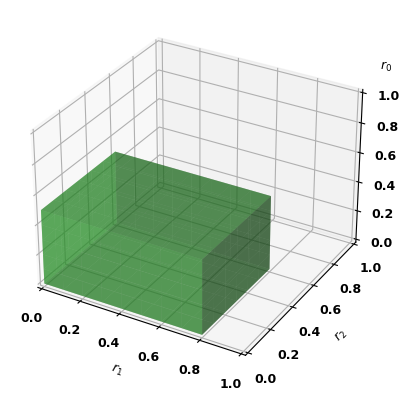

In [293]:
# Create axis
axes = [int(p2_val * 10), int(p4_val * 10), int(p8_val * 10)]

# Create Data
data = np.ones(axes)

# Plot figure
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors="tab:green", alpha=0.5);


ax.set_xlim(0, 10);
ax.set_ylim(0, 10);
ax.set_zlim(0, 10);

ax.set_xticks(np.arange(0, 12, 2))
ax.set_yticks(np.arange(0, 12, 2))
ax.set_zticks(np.arange(0, 12, 2))


ax.set_yticklabels([f"{round(s, 2)}" for s in np.arange(0, 1.2, 0.2)]);
ax.set_xticklabels([f"{round(s, 2)}" for s in np.arange(0, 1.2, 0.2)]);
ax.set_zticklabels([f"{round(s, 2)}" for s in np.arange(0, 1.2, 0.2)]);

ax.set_xlabel("$r_1$")
ax.set_ylabel("$r_2$")
ax.annotate("$r_0$", (.09, 0.06));

In [217]:
sym.solve(three_bit_condition_one(p1, p2, p3, p4, p5, p6, p7, p8, b, c), p8)

[(b - c)/b]

In [218]:
sym.solve(three_bit_condition_three(p1, p2, p2, p4, p2, p6, p7, p8, b, c), p2)[0]

(b - c/3)/b

In [294]:
sym.solve(three_bit_condition_four(p1, p2, p3, p4, p5, p4, p4, p8, b, c), p4)[0]

(b - 2*c/3)/b

In [295]:
2 ** 8

256